In [1]:
import pandas as pd
import numpy as np                                                                                       

In [2]:
df=pd.read_csv("C:\\Users\\Chitwan\\Downloads\\data.csv")
pd.set_option('display.max_columns', None)                                  
pd.set_option('display.float_format', '{:.10f}'.format)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating_Expense_Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.3705942570,0.4243894460,0.4057497720,0.6014572130,0.6014572130,0.9989692030,0.7968871460,0.8088093610,0.3026464340,0.7809848500,0.0001256970,0.0000000000,0.4581431440,0.0007250730,0.0000000000,0.1479499390,0.1479499390,0.1479499390,0.1691405880,0.3116644270,0.0175597800,0.0959205280,0.1387361600,0.0221022780,0.8481949950,0.6889794630,0.6889794630,0.2175353860,4980000000.0000000000,0.0003269770,0.2630999840,0.3637252710,0.0022589630,0.0012077550,0.6299513020,0.0212659240,0.2075762610,0.7924237390,0.0050244550,0.3902843540,0.0064785020,0.0958848340,0.1377573340,0.3980356980,0.0869565220,0.0018138840,0.0034873640,0.0001820930,0.0001165010,0.0329032260,0.0341641820,0.3929128690,0.0371353020,0.6727752920,0.1666729590,0.1906429590,0.0040944060,0.0019967710,0.0001473360,0.1473084500,0.3340151710,0.2769201580,0.0010359900,0.6762691760,0.7212745520,0.3390770070,0.0255923680,0.9032247710,0.0020216130,0.0648557080,701000000.0000000000,6550000000.0000000000,0.5938305040,458000000.0000000000,0.6715676540,0.4242057620,0.6762691760,0.3390770070,0.1265494880,0.6375553950,0.4586091480,0.5203819180,0.3129049480,0.1182504770,0,0.7168453430,0.0092194400,0.6228789590,0.6014532900,0.8278902140,0.2902018930,0.0266006310,0.5640501120,1,0.0164687410
1,1,0.4642909370,0.5382141300,0.5167300180,0.6102350860,0.6102350860,0.9989459780,

In [3]:
pd.set_option('display.float_format', '{:.10f}'.format)
df.tail()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating_Expense_Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.4936869300,0.5394679460,0.5432303660,0.6044552390,0.6044624450,0.9989920820,0.7974089660,0.8093310620,0.3035102660,0.7815877990,0.0001510210,4500000000.0000000000,0.4637343470,0.0001790180,0.1133717990,0.1750452990,0.1750452990,0.1750452990,0.2166020610,0.3209662590,0.0207662170,0.0982004720,0.1721021320,0.0223737590,0.8482045120,0.6897780780,0.6897780780,0.2176352560,7070000000.0000000000,0.0004501770,0.2645173320,0.3801553590,0.0104505130,0.0054573560,0.6314149810,0.0066551770,0.1246183150,0.8753816850,0.0051504550,0.3738232050,0.0053658480,0.0982217010,0.1711107760,0.4048039780,0.1034482760,0.0006898440,0.0091769600,40300000.0000000000,0.0001429780,0.0279032260,0.0063481340,0.3925962780,0.0063124730,0.8177693630,0.3128402550,0.5784548240,0.0994807770,0.0054691940,0.0050715480,0.1038381290,0.3462244150,0.2775431010,0.0132118310,0.7868884430,0.7367159610,0.3309138050,0.0017922370,0.9256109680,0.0022656290,0.0190596530,0.0002294150,0.0001244230,0.5939850310,0.0001077940,0.6715696820,0.4003380970,0.7868884430,0.3309138050,0.1126216010,0.6398062830,0.4586392650,0.5871781760,0.3140629670,0.0279506690,0,0.7999270350,0.0004655110,0.6236195110,0.6044545640,0.8403589600,0.2796055450,0.0270642690,0.5661932110,1,0.0298901440
6815,0,0.4751620920,0.5382686440,0.5241715300,0.5983078450,0.5983078450,0.9989921970,0.7

In [4]:
df.shape

(6819, 96)

In [5]:
#checking for null values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating_Expense_Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [6]:
df.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating_Expense_Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

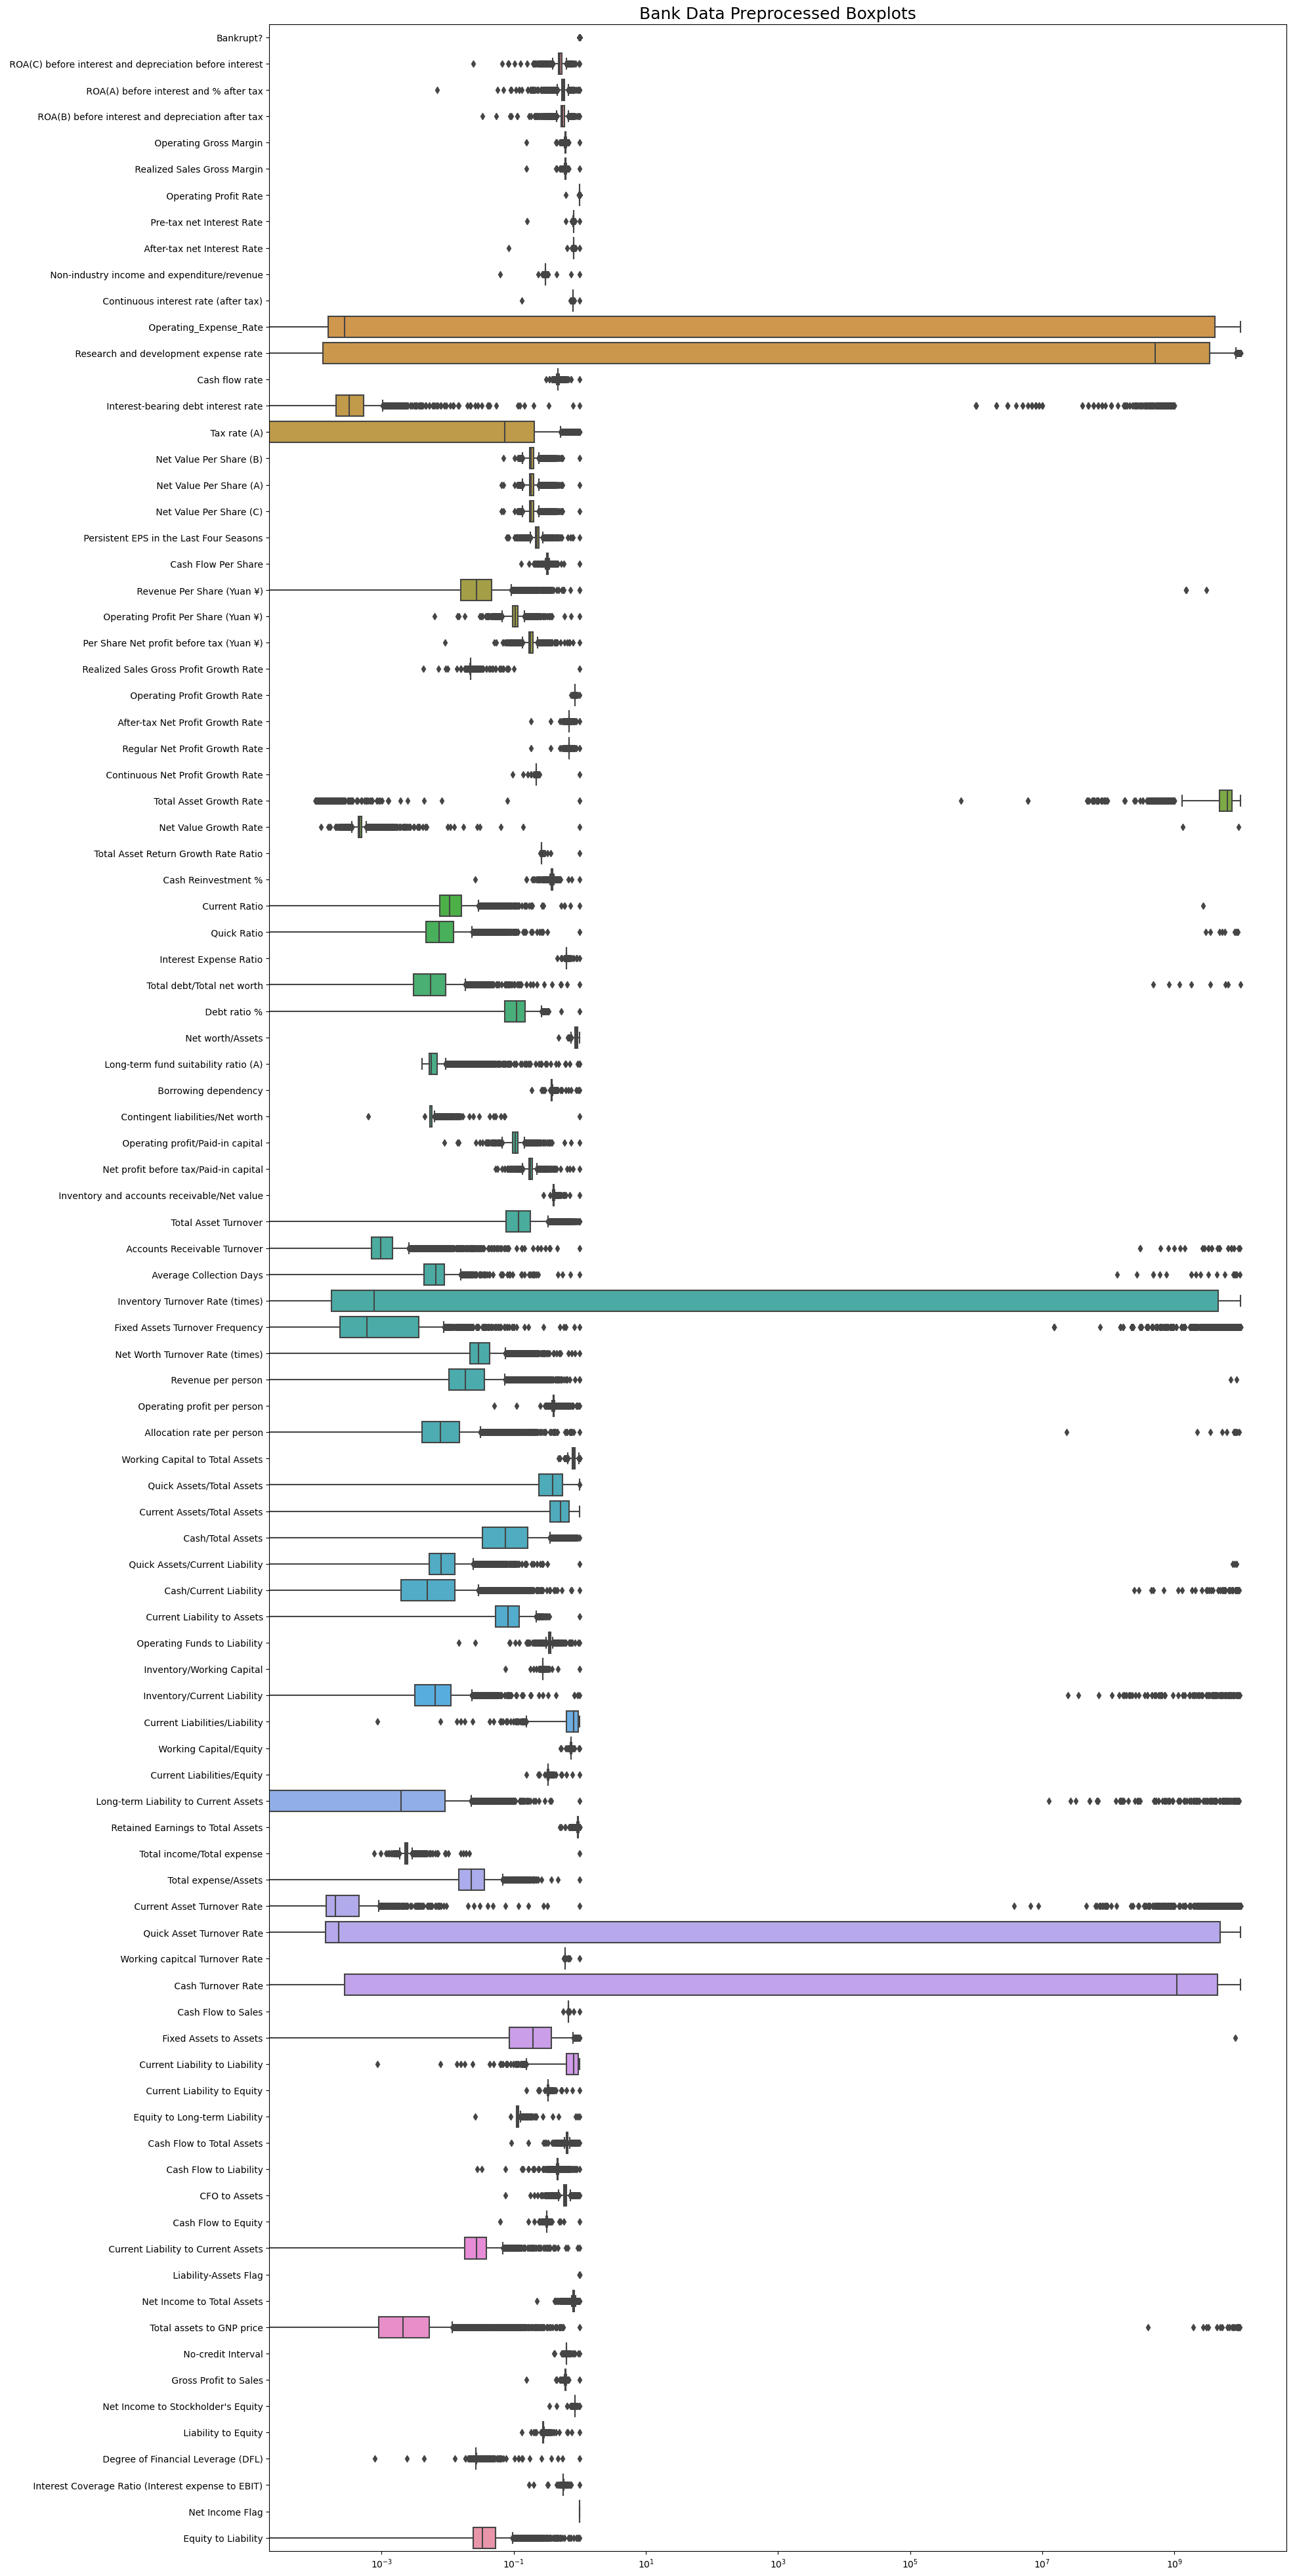

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,50))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [8]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[' Operating_Expense_Rate'] = sc.fit_transform(pd.DataFrame(df[' Operating_Expense_Rate']))
df[' Research and development expense rate'] = sc.fit_transform(pd.DataFrame(df[' Research and development expense rate']))
df[' Total Asset Growth Rate'] = sc.fit_transform(pd.DataFrame(df[' Total Asset Growth Rate']))
df[' Inventory Turnover Rate (times)'] = sc.fit_transform(pd.DataFrame(df[' Inventory Turnover Rate (times)']))
df[' Fixed Assets Turnover Frequency'] = sc.fit_transform(pd.DataFrame(df[' Fixed Assets Turnover Frequency']))
df[' Cash/Current Liability'] = sc.fit_transform(pd.DataFrame(df[' Cash/Current Liability']))
df[' Current Asset Turnover Rate'] = sc.fit_transform(pd.DataFrame(df[' Current Asset Turnover Rate']))
df[' Quick Asset Turnover Rate'] = sc.fit_transform(pd.DataFrame(df[' Quick Asset Turnover Rate']))
df[' Cash Turnover Rate'] = sc.fit_transform(pd.DataFrame(df[' Cash Turnover Rate']))
df[' Inventory/Current Liability'] = sc.fit_transform(pd.DataFrame(df[' Inventory/Current Liability']))
df[' Long-term Liability to Current Assets'] = sc.fit_transform(pd.DataFrame(df[' Long-term Liability to Current Assets']))
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating_Expense_Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.3705942570,0.4243894460,0.4057497720,0.6014572130,0.6014572130,0.9989692030,0.7968871460,0.8088093610,0.3026464340,0.7809848500,-0.6163336831,-0.7507126492,0.4581431440,0.0007250730,0.0000000000,0.1479499390,0.1479499390,0.1479499390,0.1691405880,0.3116644270,0.0175597800,0.0959205280,0.1387361600,0.0221022780,0.8481949950,0.6889794630,0.6889794630,0.2175353860,-0.1822590617,0.0003269770,0.2630999840,0.3637252710,0.0022589630,0.0012077550,0.6299513020,0.0212659240,0.2075762610,0.7924237390,0.0050244550,0.3902843540,0.0064785020,0.0958848340,0.1377573340,0.3980356980,0.0869565220,0.0018138840,0.0034873640,-0.6617258263,-0.4071227486,0.0329032260,0.0341641820,0.3929128690,0.0371353020,0.6727752920,0.1666729590,0.1906429590,0.0040944060,0.0019967710,-0.0728179748,0.1473084500,0.3340151710,0.2769201580,-0.0958865182,0.6762691760,0.7212745520,0.3390770070,-0.0949794847,0.9032247710,0.0020216130,0.0648557080,-0.1754213994,1.2997507104,0.5938305040,-0.6853973791,0.6715676540,0.4242057620,0.6762691760,0.3390770070,0.1265494880,0.6375553950,0.4586091480,0.5203819180,0.3129049480,0.1182504770,0,0.7168453430,0.0092194400,0.6228789590,0.6014532900,0.8278902140,0.2902018930,0.0266006310,0.5640501120,1,0.0164687410
1,1,0.4642909370,0.5382141300,0.5167300180,0.6102350860,0.6102350860,0.9989459780,0.7973801910,0.809300726

In [9]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

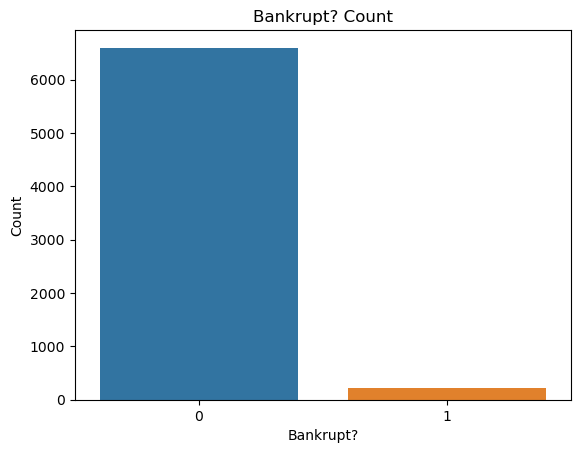

In [10]:
# Unbalanced data
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Bankrupt?', data=df)
plt.title('Bankrupt? Count')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')
plt.show()

In [11]:
# Storing Feature Matrix In X And Response (Target) In Vector y
X = df.drop('Bankrupt?',axis=1)
y = df['Bankrupt?']

In [12]:
X.shape

(6819, 95)

In [13]:
y.shape

(6819,)

In [14]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE(sampling_strategy=1,k_neighbors=5).fit_resample(X,y)

In [15]:
y_res.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

In [16]:
from sklearn import linear_model
log=linear_model.LinearRegression()
log.fit(X_res,y_res)

LinearRegression()

In [17]:
log.coef_

array([ 5.30591411e-01,  2.02129701e+00, -2.53621717e+00, -4.65379698e+02,
        1.74984653e+01,  1.20399132e+01,  1.56620149e+01, -1.91683772e+01,
        3.27584260e+00, -6.28801654e+00,  2.55402422e-03, -1.25635012e-03,
       -2.90040556e+00, -4.70663508e-11, -3.09515797e-01, -2.14755656e+01,
        7.38665479e+00,  1.33153955e+01, -2.61675041e+00,  3.03092578e+00,
        8.18258794e-11,  4.50672256e+00,  9.27144045e-01,  1.25462372e+00,
       -5.97114447e-01, -1.31896238e+00,  3.35921323e+00, -3.20343446e-01,
       -6.10659613e-03,  1.83533189e-11,  5.88487406e-01, -3.49733596e-01,
       -2.69837486e-10, -3.12638804e-12, -5.98162218e-01,  4.84448037e-11,
        1.20884728e+00, -1.20884730e+00,  1.53560833e-01,  3.13551742e+00,
       -5.89811050e-01, -1.19763611e+00, -2.18067887e+00, -8.27868994e+00,
       -3.64277471e-01, -7.96447353e-11, -3.28697070e-11, -1.22482615e-02,
        3.74627115e-02, -1.95484512e+00, -3.31539241e-11, -8.11782386e-01,
       -2.70006240e-11, -

In [18]:
parameter_names = ['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating_Expense_Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate', 'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %', 'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio', 'Total debt/Total net worth', 'Debt ratio %', 'Net worth/Assets', 'Long-term fund suitability ratio (A)', 'Borrowing dependency', 'Contingent liabilities/Net worth', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Inventory and accounts receivable/Net value', 'Total Asset Turnover', 'Accounts Receivable Turnover', 'Average Collection Days', 'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency', 'Net Worth Turnover Rate (times)', 'Revenue per person', 'Operating profit per person', 'Allocation rate per person', 'Working Capital to Total Assets', 'Quick Assets/Total Assets', 'Current Assets/Total Assets', 'Cash/Total Assets', 'Quick Assets/Current Liability', 'Cash/Current Liability', 'Current Liability to Assets', 'Operating Funds to Liability', 'Inventory/Working Capital', 'Inventory/Current Liability', 'Current Liabilities/Liability', 'Working Capital/Equity', 'Current Liabilities/Equity', 'Long-term Liability to Current Assets', 'Retained Earnings to Total Assets', 'Total income/Total expense', 'Total expense/Assets', 'Current Asset Turnover Rate', 'Quick Asset Turnover Rate', 'Working capital Turnover Rate', 'Cash Turnover Rate', 'Cash Flow to Sales', 'Fixed Assets to Assets', 'Current Liability to Liability', 'Current Liability to Equity', 'Equity to Long-term Liability', 'Cash Flow to Total Assets', 'Cash Flow to Liability', 'CFO to Assets', 'Cash Flow to Equity', 'Current Liability to Current Assets', 'Liability-Assets Flag', 'Net Income to Total Assets', 'Total assets to GNP price', 'No-credit Interval', 'Gross Profit to Sales', 'Net Income to Stockholders Equity', 'Liability to Equity', 'Degree of Financial Leverage (DFL)', 'Interest Coverage Ratio (Interest expense to EBIT)', 'Net Income Flag', 'Equity to Liability']
array=[ 4.30133046e-01,  2.14543869e+00, -2.55940182e+00, -8.65443834e+02,
        1.97505854e+01,  1.19454776e+01,  1.43634631e+01, -1.82681991e+01,
        3.56884724e+00, -5.72711253e+00,  6.25416697e-03,  2.77978010e-03,
       -2.74051852e+00, -2.25099939e-11, -3.22937982e-01, -2.12658716e+01,
        6.57486290e+00,  1.38487194e+01, -2.11453833e+00,  2.75555742e+00,
        8.05187028e-11,  4.72637185e+00,  9.40388909e-01,  1.24165877e+00,
       -6.61105998e-01, -2.30004733e+00,  4.30295976e+00, -4.98593772e-01,
       -3.20752627e-03,  3.12638804e-12,  5.14001539e-01, -3.08966436e-01,
       -2.70553357e-10, -2.22826202e-11, -4.67998486e-01,  5.33759703e-11,
        1.43067569e+00, -1.43067569e+00,  1.79105927e-01,  4.56100881e+00,
       -1.59574342e-01, -1.12162919e+00, -2.66531291e+00, -7.03071267e+00,
       -4.21897960e-01, -8.29629698e-11, -2.91890956e-11, -1.13339408e-02,
        3.53267323e-02, -1.61296049e+00, -3.05391268e-11, -8.17266180e-01,
       -2.63256084e-11, -2.96104708e-01, -6.66994922e-02,  1.78625987e-01,
       -2.26136873e-01, -4.42170744e-11,  2.27418768e-03,  3.72542061e-01,
        1.74790478e+00, -3.22996873e-01, -1.42274858e-02,  5.11576428e-02,
        5.33151711e+00,  7.29365017e+00, -2.62619351e-03,  2.13640046e-01,
        1.35698168e-01, -3.54799090e-01,  9.23499869e-03, -7.75893656e-03,
        4.02591282e+00, -6.42454061e-02,  4.03796729e+00, -1.84741111e-13,
        5.11576444e-02,  7.29365017e+00,  2.99052691e+00, -4.47344853e-02,
       -6.63892734e-01, -8.03433992e-01, -1.69483765e+00,  1.01329593e+00,
       -1.00460031e+00, -2.16323857e+00, -1.47579726e-11,  4.10830597e-01,
        8.45518008e+02,  1.71516159e+00, -1.34152840e+01,  8.61034773e-01,
       -2.34740589e-01,  0.00000000e+00, -1.69839946e-02]
decimal_array = [format(num, '.10f') if 'e' in str(num) else str(num) for num in array]
for param_name, value in zip(parameter_names, decimal_array):
    print(f"{param_name}: {value}")

ROA(C) before interest and depreciation before interest: 0.430133046
ROA(A) before interest and % after tax: 2.14543869
ROA(B) before interest and depreciation after tax: -2.55940182
Operating Gross Margin: -865.443834
Realized Sales Gross Margin: 19.7505854
Operating Profit Rate: 11.9454776
Pre-tax net Interest Rate: 14.3634631
After-tax net Interest Rate: -18.2681991
Non-industry income and expenditure/revenue: 3.56884724
Continuous interest rate (after tax): -5.72711253
Operating_Expense_Rate: 0.00625416697
Research and development expense rate: 0.0027797801
Cash flow rate: -2.74051852
Interest-bearing debt interest rate: -0.0000000000
Tax rate (A): -0.322937982
Net Value Per Share (B): -21.2658716
Net Value Per Share (A): 6.5748629
Net Value Per Share (C): 13.8487194
Persistent EPS in the Last Four Seasons: -2.11453833
Cash Flow Per Share: 2.75555742
Revenue Per Share (Yuan ¥): 0.0000000001
Operating Profit Per Share (Yuan ¥): 4.72637185
Per Share Net profit before tax (Yuan ¥): 0.

In [19]:
parameter_names = ['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating_Expense_Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate', 'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio', 'Cash Reinvestment %', 'Current Ratio', 'Quick Ratio', 'Interest Expense Ratio', 'Total debt/Total net worth', 'Debt ratio %', 'Net worth/Assets', 'Long-term fund suitability ratio (A)', 'Borrowing dependency', 'Contingent liabilities/Net worth', 'Operating profit/Paid-in capital', 'Net profit before tax/Paid-in capital', 'Inventory and accounts receivable/Net value', 'Total Asset Turnover', 'Accounts Receivable Turnover', 'Average Collection Days', 'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency', 'Net Worth Turnover Rate (times)', 'Revenue per person', 'Operating profit per person', 'Allocation rate per person', 'Working Capital to Total Assets', 'Quick Assets/Total Assets', 'Current Assets/Total Assets', 'Cash/Total Assets', 'Quick Assets/Current Liability', 'Cash/Current Liability', 'Current Liability to Assets', 'Operating Funds to Liability', 'Inventory/Working Capital', 'Inventory/Current Liability', 'Current Liabilities/Liability', 'Working Capital/Equity', 'Current Liabilities/Equity', 'Long-term Liability to Current Assets', 'Retained Earnings to Total Assets', 'Total income/Total expense', 'Total expense/Assets', 'Current Asset Turnover Rate', 'Quick Asset Turnover Rate', 'Working capital Turnover Rate', 'Cash Turnover Rate', 'Cash Flow to Sales', 'Fixed Assets to Assets', 'Current Liability to Liability', 'Current Liability to Equity', 'Equity to Long-term Liability', 'Cash Flow to Total Assets', 'Cash Flow to Liability', 'CFO to Assets', 'Cash Flow to Equity', 'Current Liability to Current Assets', 'Liability-Assets Flag', 'Net Income to Total Assets', 'Total assets to GNP price', 'No-credit Interval', 'Gross Profit to Sales', 'Net Income to Stockholders Equity', 'Liability to Equity', 'Degree of Financial Leverage (DFL)', 'Interest Coverage Ratio (Interest expense to EBIT)', 'Net Income Flag', 'Equity to Liability']
array=[ 4.30133046e-01,  2.14543869e+00, -2.55940182e+00, -8.65443834e+02,
        1.97505854e+01,  1.19454776e+01,  1.43634631e+01, -1.82681991e+01,
        3.56884724e+00, -5.72711253e+00,  6.25416697e-03,  2.77978010e-03,
       -2.74051852e+00, -2.25099939e-11, -3.22937982e-01, -2.12658716e+01,
        6.57486290e+00,  1.38487194e+01, -2.11453833e+00,  2.75555742e+00,
        8.05187028e-11,  4.72637185e+00,  9.40388909e-01,  1.24165877e+00,
       -6.61105998e-01, -2.30004733e+00,  4.30295976e+00, -4.98593772e-01,
       -3.20752627e-03,  3.12638804e-12,  5.14001539e-01, -3.08966436e-01,
       -2.70553357e-10, -2.22826202e-11, -4.67998486e-01,  5.33759703e-11,
        1.43067569e+00, -1.43067569e+00,  1.79105927e-01,  4.56100881e+00,
       -1.59574342e-01, -1.12162919e+00, -2.66531291e+00, -7.03071267e+00,
       -4.21897960e-01, -8.29629698e-11, -2.91890956e-11, -1.13339408e-02,
        3.53267323e-02, -1.61296049e+00, -3.05391268e-11, -8.17266180e-01,
       -2.63256084e-11, -2.96104708e-01, -6.66994922e-02,  1.78625987e-01,
       -2.26136873e-01, -4.42170744e-11,  2.27418768e-03,  3.72542061e-01,
        1.74790478e+00, -3.22996873e-01, -1.42274858e-02,  5.11576428e-02,
        5.33151711e+00,  7.29365017e+00, -2.62619351e-03,  2.13640046e-01,
        1.35698168e-01, -3.54799090e-01,  9.23499869e-03, -7.75893656e-03,
        4.02591282e+00, -6.42454061e-02,  4.03796729e+00, -1.84741111e-13,
        5.11576444e-02,  7.29365017e+00,  2.99052691e+00, -4.47344853e-02,
       -6.63892734e-01, -8.03433992e-01, -1.69483765e+00,  1.01329593e+00,
       -1.00460031e+00, -2.16323857e+00, -1.47579726e-11,  4.10830597e-01,
        8.45518008e+02,  1.71516159e+00, -1.34152840e+01,  8.61034773e-01,
       -2.34740589e-01,  0.00000000e+00, -1.69839946e-02]
decimal_array = [abs(num) for num in array]  # Extract absolute values

sorted_indices = sorted(range(len(decimal_array)), key=lambda k: decimal_array[k], reverse=True)
print("Parameters in descending order of their influence\n")
for idx in sorted_indices:
    formatted_value = format(array[idx], '.10f')
    print(f"{parameter_names[idx]}: {formatted_value}")

Parameters in descending order of their influence

Operating Gross Margin: -865.4438340000
Gross Profit to Sales: 845.5180080000
Net Value Per Share (B): -21.2658716000
Realized Sales Gross Margin: 19.7505854000
After-tax net Interest Rate: -18.2681991000
Pre-tax net Interest Rate: 14.3634631000
Net Value Per Share (C): 13.8487194000
Liability to Equity: -13.4152840000
Operating Profit Rate: 11.9454776000
Current Liabilities/Equity: 7.2936501700
Current Liability to Equity: 7.2936501700
Inventory and accounts receivable/Net value: -7.0307126700
Net Value Per Share (A): 6.5748629000
Continuous interest rate (after tax): -5.7271125300
Working Capital/Equity: 5.3315171100
Operating Profit Per Share (Yuan ¥): 4.7263718500
Borrowing dependency: 4.5610088100
Regular Net Profit Growth Rate: 4.3029597600
Cash Flow to Sales: 4.0379672900
Working capital Turnover Rate: 4.0259128200
Non-industry income and expenditure/revenue: 3.5688472400
Equity to Long-term Liability: 2.9905269100
Cash Flow Per

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.25,random_state=42)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [22]:
X_train.shape

(9898, 95)

In [23]:
X_train_lda.shape

(9898, 1)

In [24]:
y_pred1 = lda.predict(X_test)

from sklearn.metrics import accuracy_score
loga = accuracy_score(y_test,y_pred1)
accuracy_score(y_test,y_pred1)

0.8924242424242425

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train_lda,y_train)

LogisticRegression()

In [26]:
y_pred1 = log.predict(X_test_lda)

from sklearn.metrics import accuracy_score
loga = accuracy_score(y_test,y_pred1)
accuracy_score(y_test,y_pred1)

0.8903030303030303

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1666
           1       0.88      0.90      0.89      1634

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300


Confusion matrix:


<Axes: >

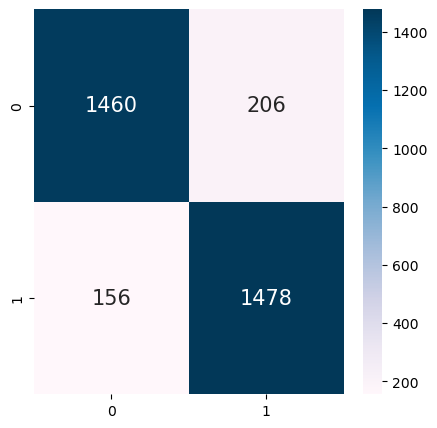

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred1 = log.predict(X_test_lda)
print("Classification report:")
print("",classification_report(y_test,y_pred1))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred1)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
y_pred2 = dt.predict(X_test)
dta = accuracy_score(y_test,y_pred2)
accuracy_score(y_test,y_pred2)

0.9512121212121212

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1666
           1       0.94      0.96      0.95      1634

    accuracy                           0.95      3300
   macro avg       0.95      0.95      0.95      3300
weighted avg       0.95      0.95      0.95      3300


Confusion matrix:


<Axes: >

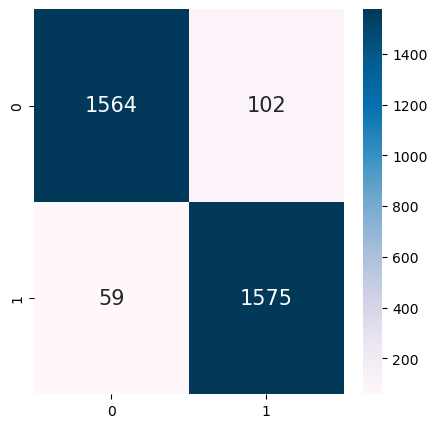

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred2 = dt.predict(X_test)
print("Classification report:")
print("",classification_report(y_test,y_pred2))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred2)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred3 = rf.predict(X_test)
rfa = accuracy_score(y_test,y_pred3)
accuracy_score(y_test,y_pred3)                                               

0.9803030303030303

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1666
           1       0.97      1.00      0.98      1634

    accuracy                           0.98      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.98      0.98      0.98      3300


Confusion matrix:


<Axes: >

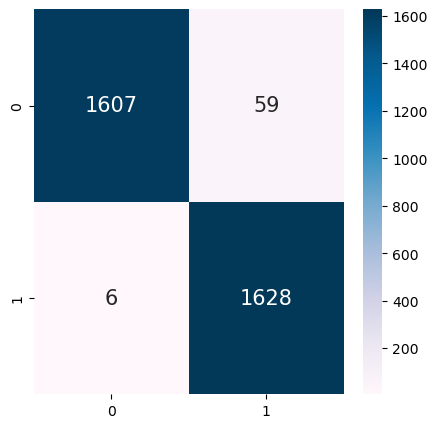

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred3 = rf.predict(X_test)
print("Classification report:")
print("",classification_report(y_test,y_pred3))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred3)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1, gamma=1)
svc.fit(X_train,y_train)           

SVC(C=1, gamma=1)

In [35]:
y_pred4 =svc.predict(X_test)
svca = accuracy_score(y_test,y_pred4)
accuracy_score(y_test,y_pred4)

0.9581818181818181

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1666
           1       0.97      0.95      0.96      1634

    accuracy                           0.96      3300
   macro avg       0.96      0.96      0.96      3300
weighted avg       0.96      0.96      0.96      3300


Confusion matrix:


<Axes: >

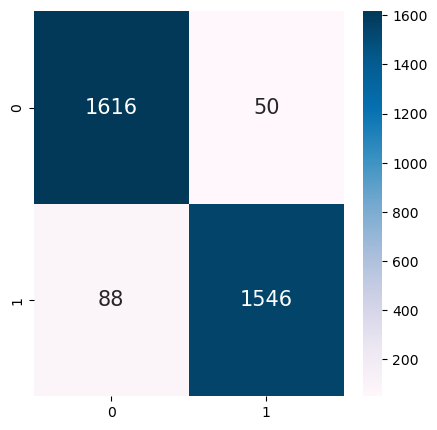

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred4 = svc.predict(X_test)
print("Classification report:")
print("",classification_report(y_test,y_pred4))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred4)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [39]:
y_pred5 =knn.predict(X_test)
knna = accuracy_score(y_test,y_pred5)
accuracy_score(y_test,y_pred5)

0.9057575757575758

In [40]:
for k in range(15):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=k+1) 
    knn.fit(X_train, y_train)
    y_pred5 =knn.predict(X_test)
    knna = accuracy_score(y_test,y_pred5)
    print(k+1,accuracy_score(y_test,y_pred5))

1 0.9496969696969697
2 0.9521212121212121
3 0.9281818181818182
4 0.9372727272727273
5 0.9121212121212121
6 0.9212121212121213
7 0.9021212121212121
8 0.9057575757575758
9 0.8945454545454545
10 0.899090909090909
11 0.8887878787878788
12 0.89
13 0.8803030303030303
14 0.8821212121212121
15 0.8718181818181818


Classification report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      1666
           1       0.80      0.98      0.88      1634

    accuracy                           0.87      3300
   macro avg       0.89      0.87      0.87      3300
weighted avg       0.89      0.87      0.87      3300


Confusion matrix:


<Axes: >

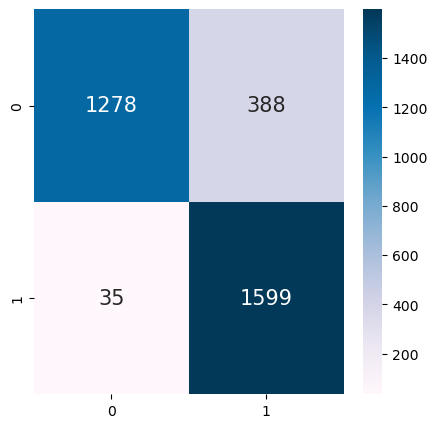

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred5 = knn.predict(X_test)
print("Classification report:")
print("",classification_report(y_test,y_pred5))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred5)
plt.rcParams['figure.figsize'] = (5, 5)
print('\nConfusion matrix:')
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='.0f')

In [47]:
#Neural Networks
import numpy as np         
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
model = keras.Sequential([
    layers.Dense(10000, activation='relu', input_shape=(95,)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_split=0.2)
y_pred_probs = model.predict(X_test)
threshold = 0.5
y_pred = (y_pred_probs > threshold).astype(int)
modela = accuracy_score(y_test,y_pred)
accuracy_score(y_test, y_pred)



Epoch 1/10
396/396 [==============================] - 41s 102ms/step - loss: 4215508.0000 - accuracy: 0.7902 - val_loss: 2201927.0000 - val_accuracy: 0.8879
Epoch 2/10
396/396 [==============================] - 39s 100ms/step - loss: 496931.7812 - accuracy: 0.8784 - val_loss: 222982.0625 - val_accuracy: 0.8894
Epoch 3/10
396/396 [==============================] - 40s 100ms/step - loss: 63613.3906 - accuracy: 0.8885 - val_loss: 114419.9531 - val_accuracy: 0.8929
Epoch 4/10
396/396 [==============================] - 40s 101ms/step - loss: 32343.4785 - accuracy: 0.8961 - val_loss: 23249.4004 - val_accuracy: 0.9051
Epoch 5/10
396/396 [==============================] - 40s 100ms/step - loss: 7783.5762 - accuracy: 0.8972 - val_loss: 3083.0276 - val_accuracy: 0.9010
Epoch 6/10
396/396 [==============================] - 40s 100ms/step - loss: 1805.9591 - accuracy: 0.9079 - val_loss: 3228.1599 - val_accuracy: 0.9172
Epoch 7/10
396/396 [==============================] - 40s 100ms/step - loss: 23

0.9248484848484848

Text(0.5, 1.0, 'Plotting the Model Accuracies')

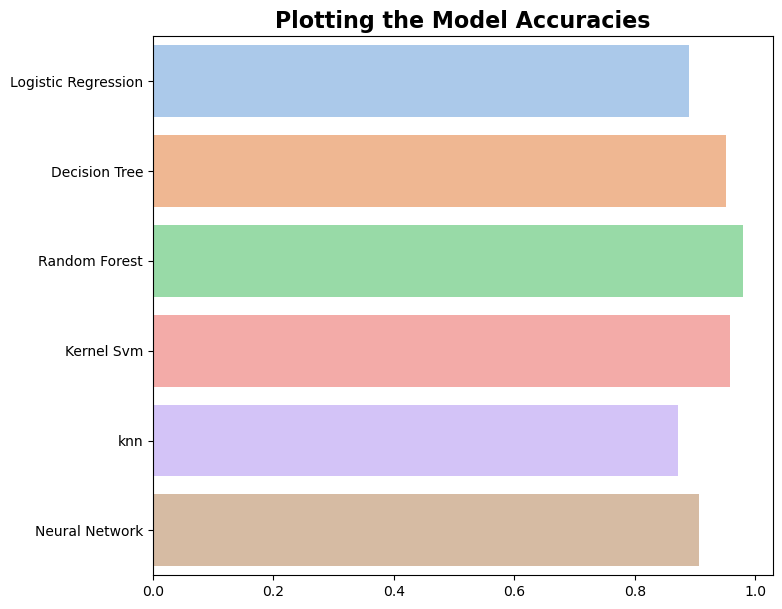

In [43]:
#comparing accuracies
import matplotlib.pyplot as plt
plt.figure(figsize= (8,7))
ac = [loga,dta,rfa,svca,knna,modela]
name = ['Logistic Regression','Decision Tree','Random Forest','Kernel Svm','knn','Neural Network']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

# Random forest did best with a accuracy score of 98%